<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/DS_Chirag_Assignment_TimeSeries_AirPassengerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [57]:
df=pd.read_csv("/content/AirPassengers.csv")
df.head(3)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [59]:
# Just renaming the column to remove "#"
df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

In [60]:
#Convert Month columns as date type

df['Month']=pd.to_datetime(df['Month'])



In [61]:
df.info()  #Checking if datatime format is applied or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [62]:
df.shape

(144, 2)

In [63]:
df.isnull().sum()    #SO No null values

Month         0
Passengers    0
dtype: int64

In [64]:
#Set date column as index so that easy to understande further

df.set_index('Month',inplace=True)


### Why Date Column set as index ?


### Easy to retrive the data
###visulization is also simple
### Some imp librarires required date column as a index scipy statsmodel)





In [65]:

df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


# EDA

1. Summary Statistics
2. Compute summary statistics such as mean, median, mode, standard deviation.
3. Visualize the Time Series Data
   Plot the Time Series data

Plot the rolling mean and rolling standard deviation of the Time Series data.


4. Stationarity Check
  Check for stationarity.
  Check for stationarity of the Time Series data using the Augmented  Dickey-Fuller test.
  Check for Autocorrelation
5. Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [66]:
#Summary Statistics
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


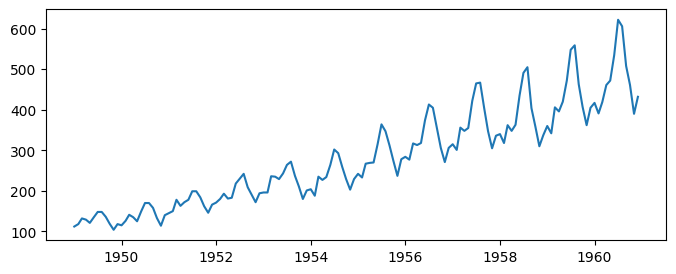

In [67]:
#Visualise time series

""" Not sure how the data is grouped to show Yearwise data. May be matplot lib default
Sumerizes as per spread of data.  How to make it mothwise data """

plt.figure(figsize=(8, 3))
plt.plot(df['Passengers'])




(array([24., 27., 19., 18., 22., 13., 10.,  6.,  3.,  2.]),
 array([104. , 155.8, 207.6, 259.4, 311.2, 363. , 414.8, 466.6, 518.4,
        570.2, 622. ]),
 <BarContainer object of 10 artists>)

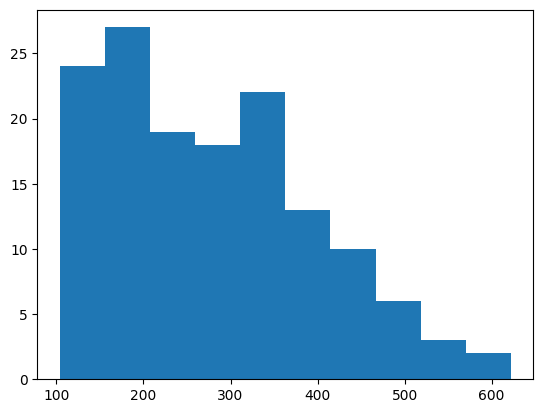

In [68]:

plt.hist(df['Passengers'])

## Number passengers grouped,  100-150 , 150-200 etc and there occurrence are plotted.
##  100-150 number of passengers appeared almost 24 times.
## 550-600+ number of passenger appeares almost 3 times
#df[df['#Passengers]>550]


In [69]:
df[df['Passengers']>=550]   # 3 times Same is in above hist plot

,Passengers
Month,
1959-08-01,559
1960-07-01,622
1960-08-01,606


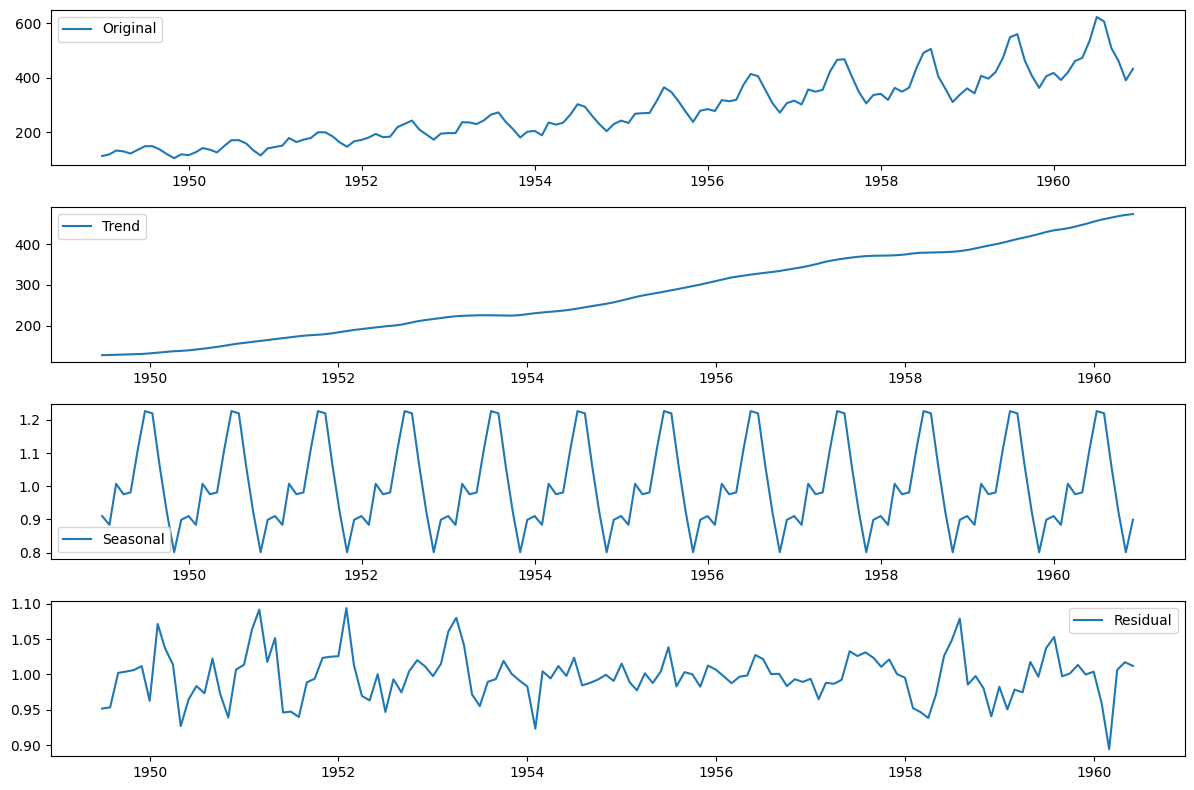

In [70]:
#Line graph shows timeseries has UPWORD TREND
# Almost Periodic highs and lows. Meaning there is seasonality
#not returnig to same value and similar pattern after long period , hence no cycles

# We need to remove this trend and seasonality.

# This can also be validated using Decompose method and see the trend seasonality etc.



# Perform seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

"""
model='multiplicative' if Seasonality amplitude is incresing or decreasing use
multiplicative
if amplitude remains constant use 'additive'

Period=12    assuming seasoniliy repeats after every 12 months

"""

# Plot the original time series and its components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Passengers'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


## Stationarity Check

### Here we will create a function as we may need to keep checking this again and again

In [71]:
def check_stationarity(ts):

  rolmean=ts.rolling(12).mean()
  rolstd=ts.rolling(12).std()
  plt.figure(figsize=(8, 4))
  plt.xlabel('Year')
  plt.ylabel('Number of Passengers')
  plt.plot(ts,label='Original Time Series')
  plt.plot(rolmean,label='Rolling Mean (12 months)', color='orange')
  plt.plot(rolstd,label='Rolling Std (12 months)', color='green')
  plt.legend()  #based on label provided in plt.plot


  #ADF(dicky fullar test)
  from statsmodels.tsa.stattools import adfuller
  adft=adfuller(ts)
  print(pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"]))

test stats       0.815369
p-value          0.991880
lag             13.000000
data points    130.000000
dtype: float64


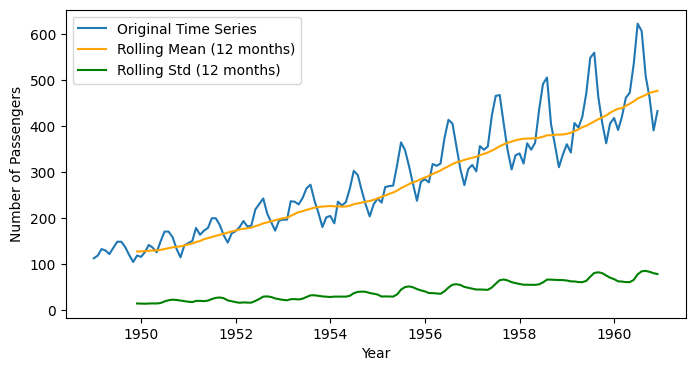

In [72]:
check_stationarity(df['Passengers'])

### From above graph, the mean and STD are changing/moving with time. Hence Timeseries is not stationary

### Dicky Fullar Test
### P-value < 0.05 Reject Null Hypotheis-- Time Series Stationery
### P-value > 0.05 accept Null Hypotheis-- Time Series Non Stationery


### lets make it stationery  Using  log Transformation

### Why log ? Why not differencing ?


test stats      -1.717017
p-value          0.422367
lag             13.000000
data points    130.000000
dtype: float64


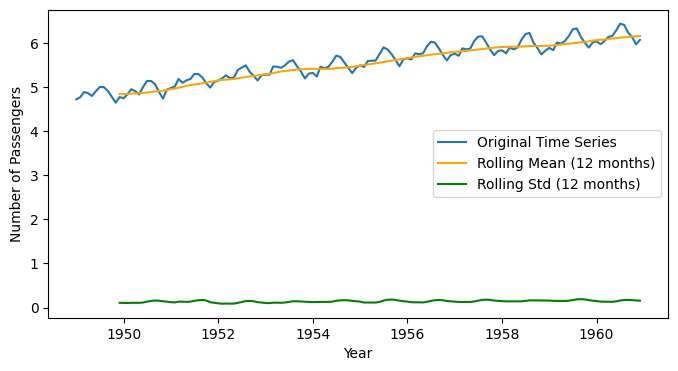

In [73]:
# Log transformation
df_log_scaled = np.log(df)

check_stationarity(df_log_scaled)


### It still has trend in it and sesonality is constant amplitude
### p value 0.42 > 0.05  data not stationery
### lets try to remove trend by removing moving average value from it

test stats      -2.156028
p-value          0.222590
lag             13.000000
data points    130.000000
dtype: float64


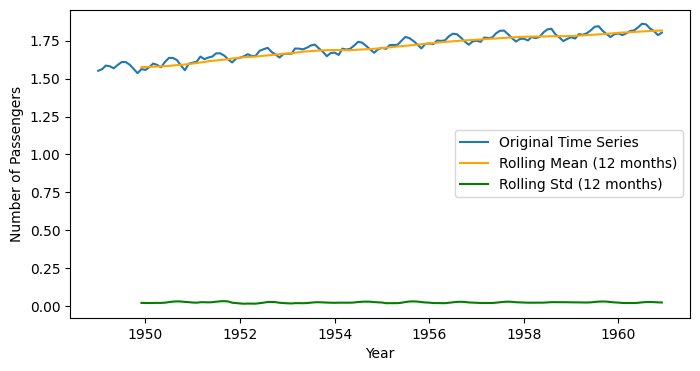

In [74]:
df_log_scaled2 = np.log(df_log_scaled)

check_stationarity(df_log_scaled2)

test stats      -2.391668
p-value          0.144102
lag             13.000000
data points    130.000000
dtype: float64


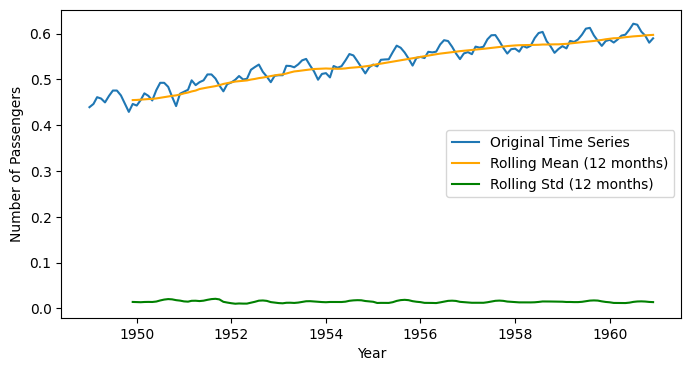

In [75]:
df_log_scaled3 = np.log(df_log_scaled2)

check_stationarity(df_log_scaled3)

In [76]:
"""
mov_avg=df_log_scaled.rolling(12).mean()
mov_avg

##Rolling mean over 12 past intervals hence 11 NAN will be there."""

'\nmov_avg=df_log_scaled.rolling(12).mean()\nmov_avg\n\n##Rolling mean over 12 past intervals hence 11 NAN will be there.'

In [77]:
"""df_passenger_log_minus_ma=df_log_scaled-mov_avg
df_passenger_log_minus_ma.dropna(inplace=True)
check_stationarity(df_passenger_log_minus_ma)"""

'df_passenger_log_minus_ma=df_log_scaled-mov_avg\ndf_passenger_log_minus_ma.dropna(inplace=True)\ncheck_stationarity(df_passenger_log_minus_ma)'

## Now see the mean and std almost flat line .
## P value 0.02  < 0.05  Now series is stationery

 ## Now Lets move to create ARIMA. Remeber ARIMA Requires p d and q
 ## Try to get this using PACF (p) and ACF (q)


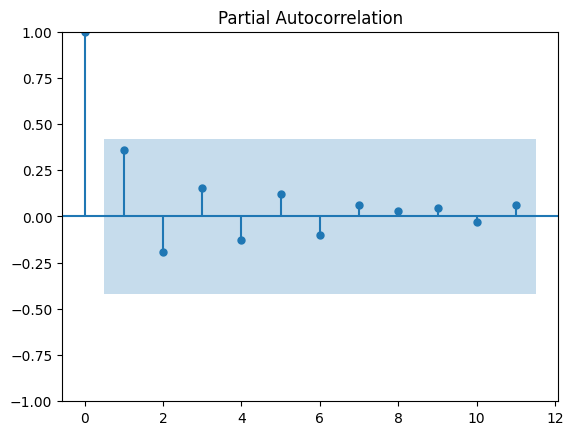

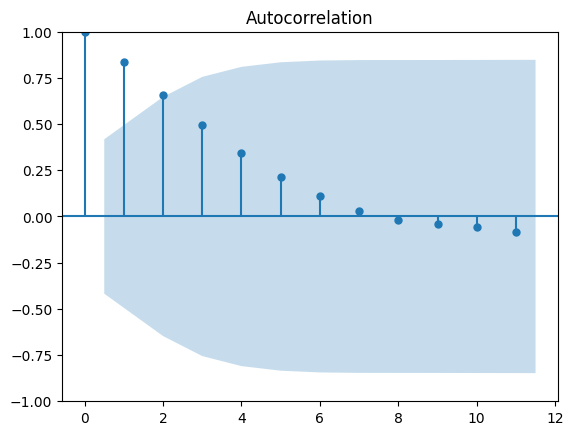

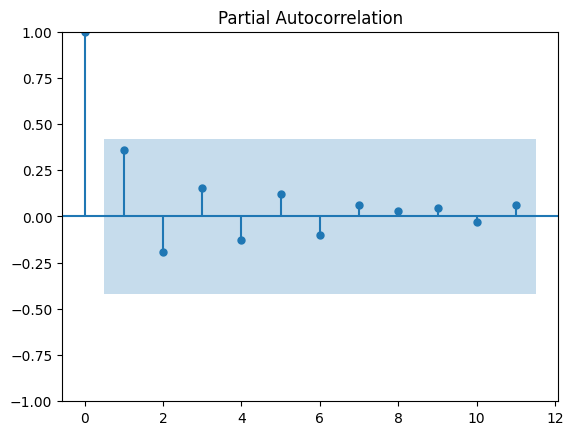

In [78]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

lag_pacf=pacf(df_log_scaled3)
lag_acf=acf(df_log_scaled3)

plot_acf(lag_acf)
plot_pacf(lag_pacf)

## AR >> From PACF graph, first zero converges at value apx 10  Hence p=10
## I  >> Differencing will take 1 for now later adjust.  d=1
## MA >>from acf graph , first zero converges at value apx 9  Hence q=9

## Lets split data in Train and Test and then build model using this p d q

In [79]:
## Train test split

split_point=len(df_log_scaled3)-20
split_point

124

In [80]:
train=df_log_scaled3[:split_point]
test=df_log_scaled3[split_point:]
len(train),len(test)

(124, 20)

## Create ARIM and Fit in

In [81]:
import statsmodels.api as sm

In [82]:
## TRAIN MODEL

model=sm.tsa.arima.ARIMA(train,order=(10,1,9))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  124
Model:                ARIMA(10, 1, 9)   Log Likelihood                 455.543
Date:                Fri, 23 Feb 2024   AIC                           -871.085
Time:                        11:29:48   BIC                           -814.841
Sample:                    01-01-1949   HQIC                          -848.239
                         - 04-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0111      0.130     -0.086      0.932      -0.266       0.243
ar.L2         -0.8439      0.100     -8.444      0.000      -1.040      -0.648
ar.L3          0.0716      0.079      0.910      0.363      -0.083       0.226
ar.L4         -0.9383      0.088    -10.671      0.000      -1.111      -0.766
ar.L5         -0.0011      0.131     -0.008      0.994      -0.257       0.255
ar.L6         -0.8071      0.126     -6.421      0.000      -1.053      -0.561
ar.L7          0.0453      0.092      0.492      0.622      -0.135       0.225
ar.L8         -0.9533      0.087    -10.941      0.000      -1.124      -0.783
ar.L9         -0.0937      0.119     -0.790      0.429      -0.326       0.139
ar.L10        -0.6751      0.088     -7.647      0.000      -0.848      -0.502
ma.L1         -0.1741      0.230     -0.758      0.448      -0.624       0.276
ma.L2          0.5559      0.184      3.018      0.003       0.195       0.917
ma.L3         -0.3536      0.188     -1.878      0.060      -0.723       0.015
ma.L4          0.5015      0.182      2.756      0.006       0.145       0.858
ma.L5         -0.1395      0.184     -0.760      0.447      -0.499       0.220
ma.L6          0.4513      0.242      1.861      0.063      -0.024       0.927
ma.L7         -0.0128      0.201     -0.064      0.949      -0.407       0.382
ma.L8          0.6699      0.216      3.101      0.002       0.247       1.093
ma.L9          0.1160      0.202      0.575      0.565      -0.279       0.511
sigma2      3.167e-05   7.24e-06      4.377      0.000    1.75e-05    4.59e-05
===================================================================================
Ljung-Box (L1) (Q):                   5.23   Jarque-Bera (JB):                 4.32
Prob(Q):                              0.02   Prob(JB):                         0.12
Heteroskedasticity (H):               0.28   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
Start=split_point
End=len(df_log_scaled3)-1

Start, End

(124, 143)

In [84]:
## TEST

Start=split_point
End=len(df_log_scaled3)-1

pred=model.predict(start=Start,end=End,typ='levels')
print(pred)

1959-05-01    0.584641
1959-06-01    0.597203
1959-07-01    0.605326
1959-08-01    0.604507
1959-09-01    0.589170
1959-10-01    0.579946
1959-11-01    0.567283
1959-12-01    0.570381
1960-01-01    0.575097
1960-02-01    0.570519
1960-03-01    0.579980
1960-04-01    0.579472
1960-05-01    0.585754
1960-06-01    0.598789
1960-07-01    0.604058
1960-08-01    0.602283
1960-09-01    0.588815
1960-10-01    0.581273
1960-11-01    0.570771
1960-12-01    0.570401
Freq: MS, Name: predicted_mean, dtype: float64


In [85]:
len(pred), len(test)

(20, 20)

In [95]:
## Reversal of log scaled we had taken till 3 log level while stationarity
pred_set=np.exp(np.exp(np.exp(pred)))
test_set=np.exp(np.exp(np.exp(test)))

In [97]:
pred_set.head(3)  #just checking if reversal is good

1959-05-01    409.748393
1959-06-01    470.384432
1959-07-01    515.647851
Freq: MS, Name: predicted_mean, dtype: float64

In [92]:
test_set.head(3)

,Passengers
Month,
1959-05-01,420.0
1959-06-01,472.0
1959-07-01,548.0


## Creating Validation function so can be used repetatively

In [98]:
def validate_prediction(pred_set,test_set):
  # Plot graph of predicted data and test data. see if both inline
  plt.figure(figsize=(8, 4))
  plt.plot(test_set,label='Test data',color='blue')
  plt.plot(pred_set,label='Predicted data',color='orange')
  plt.legend()

  # RMSE Test. Expected Err value is close to Zero.
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rmse=sqrt(mean_squared_error(pred_set,test_set))
  print("Root mean square error is %0.4f" % rmse)


Root mean square error is 57.9676


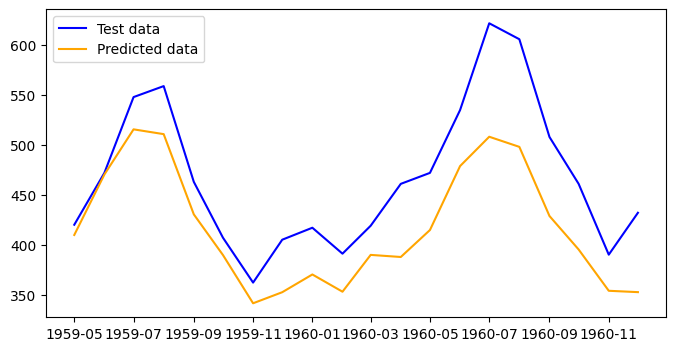

In [99]:
validate_prediction(pred_set,test_set)

FROM the Graph  Prediction is not Good but well, atlest follows the trend. May be p d and q value are not correct, need to fine tune them

But the RMSE is not closed to Zero. Model is not good

## Lets find ORDER (p,d,q) using Auto_Arima  and tune the model

In [100]:
pip install pmdarima

In [103]:
#### Find Order of ARIMA for this series

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")


stepwise_fit=auto_arima(df_log_scaled3,trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-896.609, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-870.837, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-872.885, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-874.490, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-871.618, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-898.600, Time=1.62 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-884.800, Time=0.73 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-873.116, Time=0.55 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-889.800, Time=0.88 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-883.801, Time=0.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-901.874, Time=1.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-875.004, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-896.552, Time=1.33 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-873.980, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 455.937
Date:                Fri, 23 Feb 2024   AIC                           -901.874
Time:                        11:36:31   BIC                           -887.060
Sample:                    01-01-1949   HQIC                          -895.855
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004   8.46e-05      5.192      0.000       0.000       0.001
ar.L1          0.9630      0.078     12.398      0.000       0.811       1.115
ar.L2         -0.3739      0.083     -4.484      0.000      -0.537      -0.210
ma.L1         -0.9506      0.043    -21.884      0.000      -1.036      -0.865
sigma2      9.837e-05   1.61e-05      6.110      0.000    6.68e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 5.87
Prob(Q):                              0.61   Prob(JB):                         0.05
Heteroskedasticity (H):               0.68   Skew:                             0.17
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### let supply this to   ARIMA(2,1,1) Let use it and build again

In [131]:
## TRAIN MODEL

model_1=sm.tsa.arima.ARIMA(train,order=(18,1,8))
model_1=model_1.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  124
Model:                ARIMA(18, 1, 8)   Log Likelihood                 476.242
Date:                Fri, 23 Feb 2024   AIC                           -898.483
Time:                        11:44:56   BIC                           -822.554
Sample:                    01-01-1949   HQIC                          -867.641
                         - 04-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3049     23.907     -0.013      0.990     -47.162      46.552
ar.L2          0.1042     24.359      0.004      0.997     -47.639      47.847
ar.L3          0.1695     10.453      0.016      0.987     -20.317      20.656
ar.L4          0.1509     12.617      0.012      0.990     -24.579      24.881
ar.L5         -0.1545     15.061     -0.010      0.992     -29.674      29.365
ar.L6         -0.1045      9.482     -0.011      0.991     -18.690      18.480
ar.L7          0.0380      1.093      0.035      0.972      -2.104       2.180
ar.L8         -0.0816      1.247     -0.065      0.948      -2.525       2.362
ar.L9         -0.0087      1.958     -0.004      0.996      -3.847       3.829
ar.L10        -0.0455      1.691     -0.027      0.979      -3.360       3.269
ar.L11         0.1089      1.423      0.077      0.939      -2.680       2.897
ar.L12         0.8276      2.793      0.296      0.767      -4.647       6.302
ar.L13         0.3353     20.829      0.016      0.987     -40.488      41.159
ar.L14        -0.1853     21.805     -0.008      0.993     -42.923      42.552
ar.L15        -0.1126     10.342     -0.011      0.991     -20.382      20.157
ar.L16        -0.1932     11.729     -0.016      0.987     -23.183      22.796
ar.L17         0.1661     14.009      0.012      0.991     -27.291      27.624
ar.L18         0.0812      9.607      0.008      0.993     -18.748      18.910
ma.L1          0.1498     23.878      0.006      0.995     -46.650      46.950
ma.L2         -0.1245     22.506     -0.006      0.996     -44.235      43.986
ma.L3         -0.2473      8.903     -0.028      0.978     -17.698      17.203
ma.L4         -0.2507     13.267     -0.019      0.985     -26.254      25.753
ma.L5          0.1998     16.981      0.012      0.991     -33.082      33.482
ma.L6          0.1672      9.915      0.017      0.987     -19.267      19.601
ma.L7         -0.0326      3.338     -0.010      0.992      -6.575       6.510
ma.L8         -0.0392      2.683     -0.015      0.988      -5.298       5.219
sigma2      2.191e-05   4.06e-06      5.393      0.000    1.39e-05    2.99e-05
===================================================================================
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):                 2.70
Prob(Q):                              0.27   Prob(JB):                         0.26
Heteroskedasticity (H):               0.21   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.89e+14. Standard errors may be unstable.
"""

In [132]:
## TEST

Start=split_point
End=len(df_log_scaled3)-1

pred_1=model_1.predict(start=Start,end=End,typ='levels')
print(pred_1)



1959-05-01    0.585249
1959-06-01    0.600734
1959-07-01    0.611129
1959-08-01    0.611406
1959-09-01    0.594087
1959-10-01    0.581624
1959-11-01    0.570217
1959-12-01    0.576359
1960-01-01    0.583615
1960-02-01    0.578995
1960-03-01    0.591818
1960-04-01    0.590441
1960-05-01    0.593761
1960-06-01    0.609537
1960-07-01    0.618724
1960-08-01    0.618151
1960-09-01    0.601968
1960-10-01    0.589798
1960-11-01    0.580036
1960-12-01    0.585421
Freq: MS, Name: predicted_mean, dtype: float64


In [133]:
len(pred_1), len(test)

(20, 20)

In [134]:
## Reversal of log scaled. 3 level log while stationarity
pred_1_set=np.exp(np.exp(np.exp(pred_1)))
test_1_set=np.exp(np.exp(np.exp(test)))

Root mean square error is 15.8431


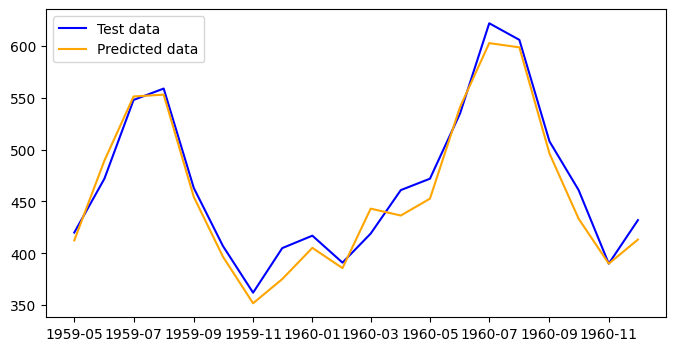

In [135]:
validate_prediction(pred_1_set,test_1_set)

## here Graph show good predictions with Test data. RMSE is also Less.

## Now lets move further and try to forcast


### Future Predicition


In [136]:
df.tail(2)  # From these  index onwards we need to predict 1960-11-01

,Passengers
Month,
1960-11-01,390
1960-12-01,432


In [137]:
index_future_dates=pd.date_range(start='1960-11-01',end='1962-12-01	',freq='MS')

pred_future=model_1.predict(start=len(df),end=len(df)+25,typ='levels').rename("ARIMA Predictions")

pred_future.index=index_future_dates
pred_future=np.exp(np.exp(np.exp(pred_future))) # log reversal. 3 log level
print(pred_future)

1960-11-01    446.227654
1960-12-01    428.408789
1961-01-01    475.495265
1961-02-01    473.504070
1961-03-01    489.755156
1961-04-01    587.810854
1961-05-01    648.730444
1961-06-01    637.478224
1961-07-01    533.959193
1961-08-01    466.239097
1961-09-01    426.184054
1961-10-01    448.850958
1961-11-01    484.714167
1961-12-01    467.248458
1962-01-01    504.804775
1962-02-01    505.575231
1962-03-01    524.305332
1962-04-01    627.687581
1962-05-01    689.323579
1962-06-01    669.208569
1962-07-01    566.943402
1962-08-01    495.398434
1962-09-01    459.653801
1962-10-01    482.114470
1962-11-01    519.737830
1962-12-01    502.369477
Freq: MS, Name: ARIMA Predictions, dtype: float64


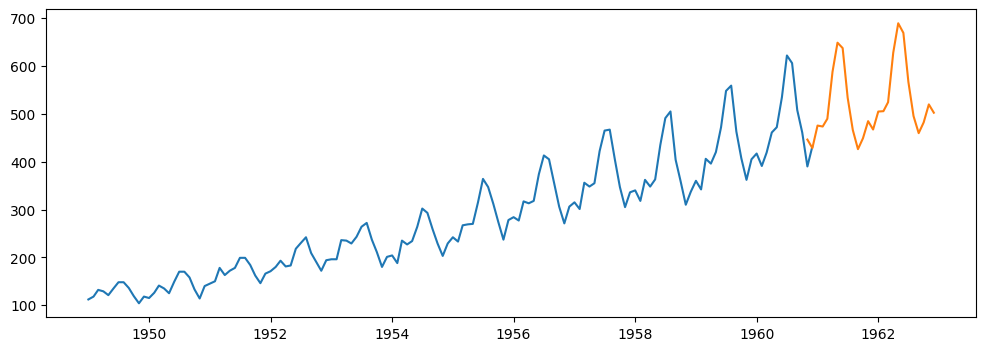

In [138]:
plt.figure(figsize=(12,4))
plt.plot(df)
plt.plot(pred_future)

